In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# **1. nn.MaxPool2d() – Maximum Pooling**

In [ ]:
x = torch.tensor([
    [[
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9,10,11,12],
        [13,14,15,16]
    ]]
], dtype=torch.float)
x,x.shape


(tensor([[[[ 1.,  2.,  3.,  4.],
           [ 5.,  6.,  7.,  8.],
           [ 9., 10., 11., 12.],
           [13., 14., 15., 16.]]]]),
 torch.Size([1, 1, 4, 4]))

In [ ]:
pool = nn.MaxPool2d(kernel_size=2, stride=2)
output = pool(x)
output


tensor([[[[ 6.,  8.],
          [14., 16.]]]])

# **2. nn.AvgPool2d() – Average Pooling**

In [ ]:
x

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [ ]:
pool = nn.AvgPool2d(kernel_size=2, stride=2)
output = pool(x)
output


tensor([[[[ 3.5000,  5.5000],
          [11.5000, 13.5000]]]])

# **3. nn.AdaptiveMaxPool2d() – Output Size Control**

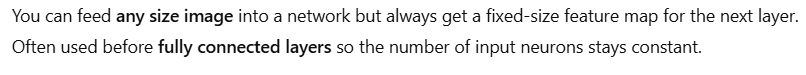

In [ ]:
pool = nn.AdaptiveMaxPool2d((2, 2))
output = pool(x)
output

tensor([[[[ 6.,  8.],
          [14., 16.]]]])

# **4. nn.AdaptiveAvgPool2d() – Output Size Control (Average)**

In [ ]:
x

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [ ]:
pool = nn.AdaptiveAvgPool2d((2, 2))
output = pool(x)
print(output)


tensor([[[[ 3.5000,  5.5000],
          [11.5000, 13.5000]]]])


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving images.jpg to images.jpg


In [ ]:
image_path=list(uploaded.keys())[0]

In [ ]:
img=Image.open(image_path).convert('L')
transform=transforms.ToTensor()
img_tensor=transform(img)

In [ ]:
images=[img_tensor]

In [ ]:
def plot_subsample(images, pool_type, pool_size):
    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    if pool_type.lower() == 'max':
        pool = F.max_pool2d
    elif pool_type.lower() in ['mean', 'avg']:
        pool = F.avg_pool2d
    else:
        raise ValueError(f'pool_type must be either max or mean, got: {pool_type}')
    n_images = images.shape[0]

    pooled_images = pool(images, kernel_size=pool_size)

    fig = plt.figure(figsize=(20, 5))

    for i in range(n_images):

        ax = fig.add_subplot(2, n_images, i+1)
        ax.imshow(images[i].squeeze(0), cmap='bone')
        ax.set_title('Original')
        ax.axis('off')

        image = pooled_images[i].squeeze(0)

        ax = fig.add_subplot(2, n_images, n_images+i+1)
        ax.imshow(image, cmap='bone')
        ax.set_title('Subsampled')
        ax.axis('off')

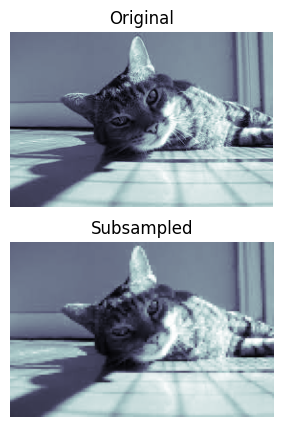

In [ ]:
plot_subsample(images, 'max', 2)

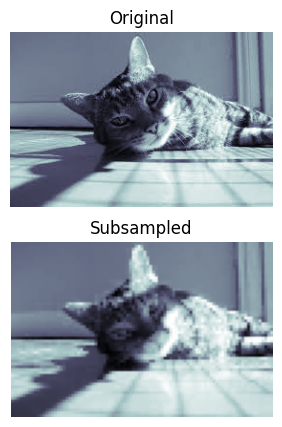

In [ ]:
plot_subsample(images, 'max', 3)

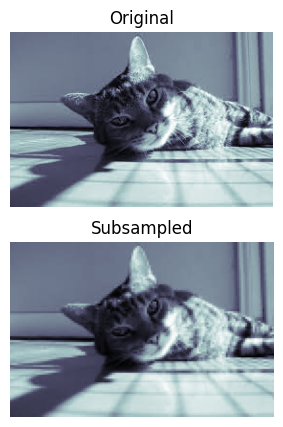

In [ ]:
plot_subsample(images, 'avg', 2)

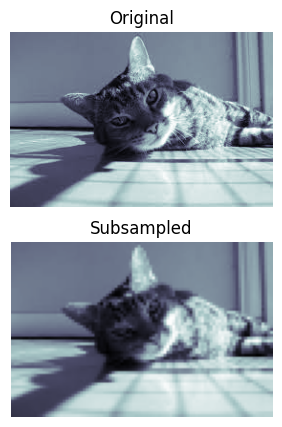

In [ ]:
plot_subsample(images, 'avg', 3)